In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt



In [3]:
# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [4]:

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [5]:

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


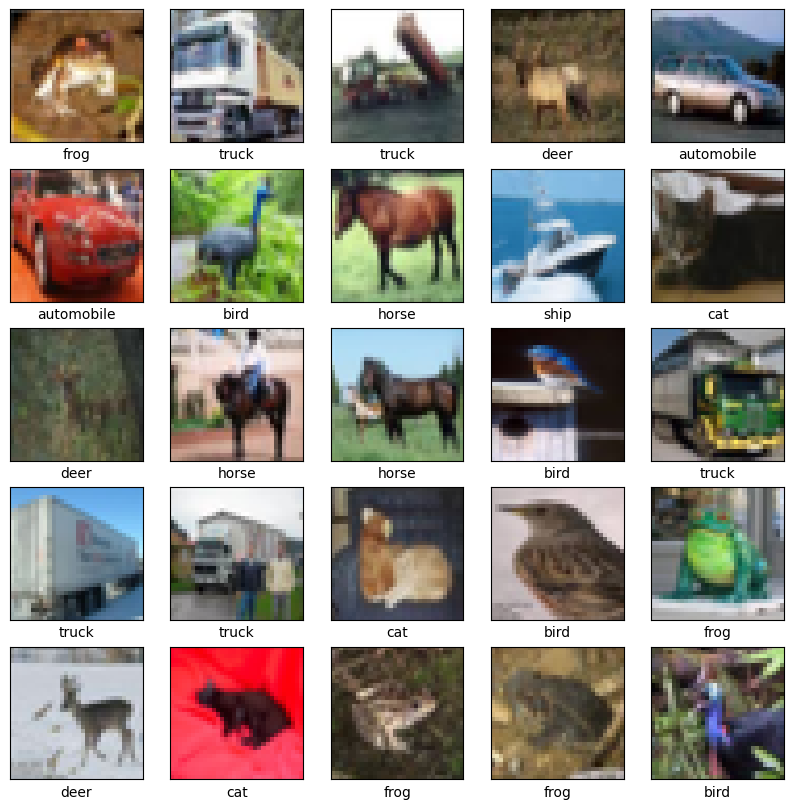

In [6]:

# Visualize some examples from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [7]:

# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [8]:

# Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [9]:

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [10]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5947 - accuracy: 0.4152 - val_loss: 1.3560 - val_accuracy: 0.5103
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2218 - accuracy: 0.5651 - val_loss: 1.1429 - val_accuracy: 0.5958
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0704 - accuracy: 0.6223 - val_loss: 1.0614 - val_accuracy: 0.6237
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9669 - accuracy: 0.6610 - val_loss: 0.9957 - val_accuracy: 0.6555
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8937 - accuracy: 0.6854 - val_loss: 0.9325 - val_accuracy: 0.6751
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8420 - accuracy: 0.7043 - val_loss: 0.9202 - val_accuracy: 0.6841
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7923 - accuracy: 0.7215 - val_loss: 0.8796 -

In [12]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 4s - loss: 0.8379 - accuracy: 0.7151 - 4s/epoch - 12ms/step

Test accuracy: 0.7150999903678894


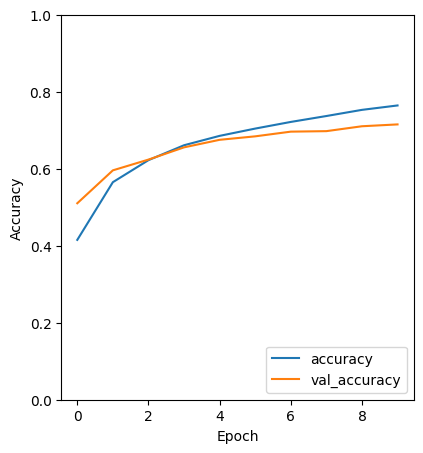

In [13]:

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


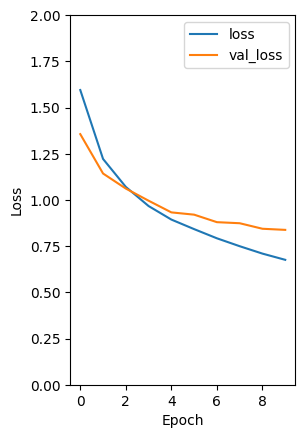

In [14]:

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')

plt.show()


In [15]:

# Make predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)


313/313 [==============================] - 4s 12ms/step


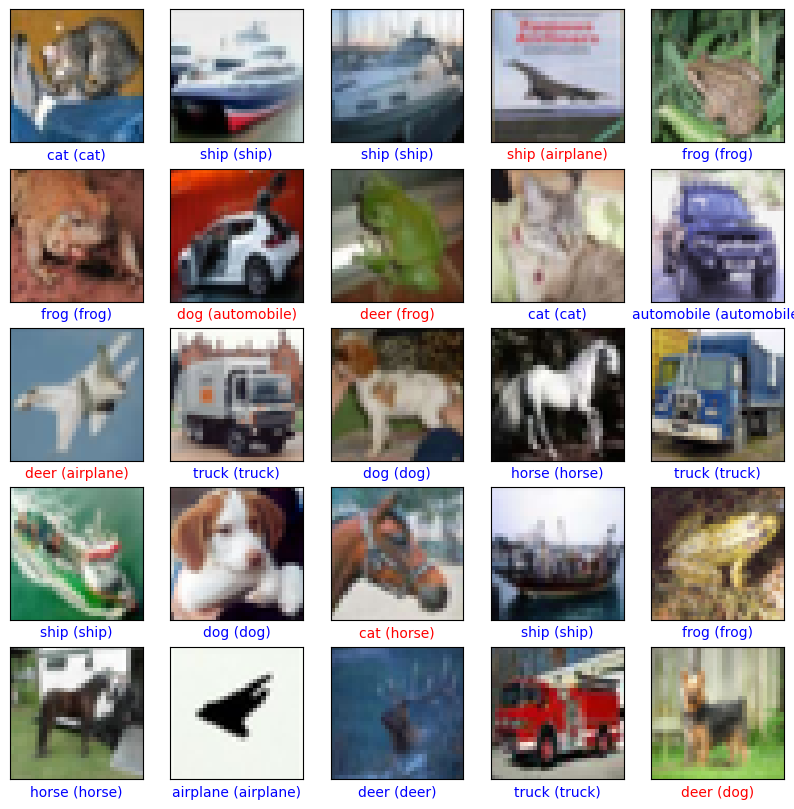

In [16]:

# Display some test images with predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[tf.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()
